### **Implementation of Gradient Descent From Scratch**

#### **This is a Simple Example of fitting a line to a Dataset by using Gradient Descent**

#### **Import Matplotlib for plotting curves**

In [118]:
import matplotlib.pyplot as plt

#### **Function to get the Predicted values (y) from the line y = mx + b**

In [119]:
def Predict ( m , b , x ) :
    return m * x + b

#### **Get Some Sample Data**

In [120]:
dataX = [ 1 , 3 ]
dataY = [ 2 , 3 ]

#### **Decide on a Cost Function**
##### **1.** `In this case, we use Sum of the Squared Residuals as a Cost Function`
##### **2.** `Sum of Squared Residuals = Σ ( Actual Value - Predicted Value )²`

In [121]:
def SumSquaredResiduals ( m , b ) :
    ssr = 0
    for i in range ( 0 , len ( dataX ) ) :
        ssr = ssr + ( m * dataX [ i ] + b - dataY [ i ] ) * ( m * dataX [ i ] + b - dataY [ i ] )
    return ssr

#### **Find The Gradient of the Sum of Squared Residuals With Respect to Variables ( m and b in this case )**
##### **1.** `We will use Chain Rule to Calculate the Partial Derivative :`
`∂f/∂m` and `∂f/∂b`

In [122]:
# Gradient With Respect to m (Slope)
def Gradient_m ( m , b ) :
    g = 0
    for i in range ( 0, len ( dataX ) ) :
        g = g + 2 * ( m * dataX [ i ] + b - dataY [ i ] ) * dataX [ i ]
    return g

# Gradient With Respect to b (y intercerpt)
def Gradient_b ( m , b ) :
    g = 0
    for i in range ( 0, len ( dataX ) ) :
        g = g + 2 * ( m * dataX [ i ] + b - dataY [ i ] )
    return g

#### **Define the Learning Rate and the Epoch**
##### **1.** `Learning Rate is the Amount by which the gradient gets close to being zero i.e. (Local) Minimum Value of Cost Function`
##### **2.** `Epoch is the Total Number of iterations we Perform on the Dataset`

In [123]:
learningRate = 0.01
epochs = 1000

#### **Take Some Random initial value of Slope (m) and the y-intercept (b)**
##### `We will change these values later on using Gradient Descent for Optimal Prediction`

In [124]:
b = 0
m = 1

#### **Perform Gradient Descent**

In [125]:
# curve_m will hold the values of the slope which we get after performing each iteration of Gradient Descent
curve_m = []
# curve_b will hold the values of the y-intercept which we get after performing each iteration of Gradient Descent
curve_b = []
# curve_ss will hold the values of the Sum of the Squared Residuals which we get from the current m (slope) and b (y-intercept) values
curve_ssr = []

# This loop will run for epoch number of times, because thats what epoch is for!
for i in range ( 0 , epochs ) :
    sumSquaredResiduals = SumSquaredResiduals ( m , b )
    
    gradient_m = Gradient_m ( m , b )
    gradient_b = Gradient_b ( m , b )
    
    m = m - gradient_m * learningRate
    b = b - gradient_b * learningRate
    
    curve_m.append ( m )
    curve_b.append ( b )
    curve_ssr.append ( sumSquaredResiduals )

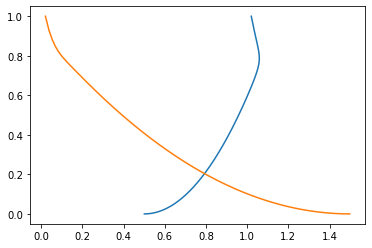

In [126]:
# The Following line allows us to view Matplotlib curve inside of the Jupyter Notebook
%matplotlib inline

# Slope vs. Sum of Squared Residual Curve
plt.plot ( curve_m , curve_ssr)
# y-intercept vs. Sum of Squared Residual Curv
plt.plot ( curve_b , curve_ssr)

#### **Draw Curve to Visualize the Results**

Predicted Slope, m =  0.5006164743204595
Predicted Y-Intercept, b =  1.4985116993346916


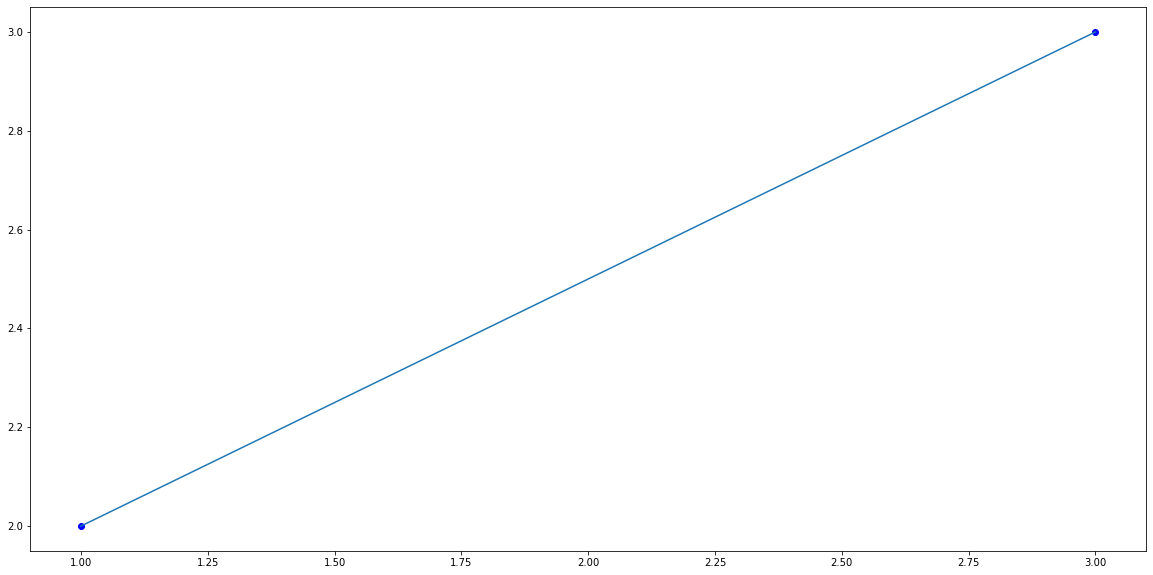

In [127]:
# Print the predicted values
print ( "Predicted Slope, m = " , m )
print ( "Predicted Y-Intercept, b = " , b )

# Following line define the Size of the matplotlib curve
plt.figure ( figsize = ( 20 , 10 ) )

# Plot a curve between predicted and actual values
for i in range ( 0 , len ( dataX ) ) :
    plt.plot ( dataX [ i ] , dataY [ i ] , 'bo' )

predictY = []
for i in range ( 0 , len ( dataX ) ) :
    predictY.append ( Predict ( m , b , dataX [ i ] ) )
plt.plot ( dataX , predictY )